<a href="https://colab.research.google.com/github/OmniaMohammed99/DA/blob/main/my_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCH = 10
CHANNELS = 3

get the data

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/cherry_disease_classification/cherry_disease",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 1916 files belonging to 2 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Cherry___Powdery_mildew', 'Cherry___healthy']

In [4]:
len(dataset)

60

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

In [5]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[200. 188. 188.]
  [200. 188. 188.]
  [204. 192. 192.]
  ...
  [218. 208. 207.]
  [209. 199. 198.]
  [227. 217. 216.]]

 [[192. 180. 180.]
  [195. 183. 183.]
  [201. 189. 189.]
  ...
  [233. 223. 222.]
  [229. 219. 218.]
  [217. 207. 206.]]

 [[215. 203. 203.]
  [219. 207. 207.]
  [219. 207. 207.]
  ...
  [204. 194. 193.]
  [195. 185. 184.]
  [238. 228. 227.]]

 ...

 [[206. 192. 191.]
  [216. 202. 201.]
  [208. 194. 193.]
  ...
  [239. 225. 224.]
  [246. 232. 231.]
  [197. 183. 182.]]

 [[220. 206. 205.]
  [231. 217. 216.]
  [214. 200. 199.]
  ...
  [195. 181. 180.]
  [186. 172. 171.]
  [185. 171. 170.]]

 [[231. 217. 216.]
  [227. 213. 212.]
  [207. 193. 192.]
  ...
  [216. 202. 201.]
  [222. 208. 207.]
  [236. 222. 221.]]]


visualize the data

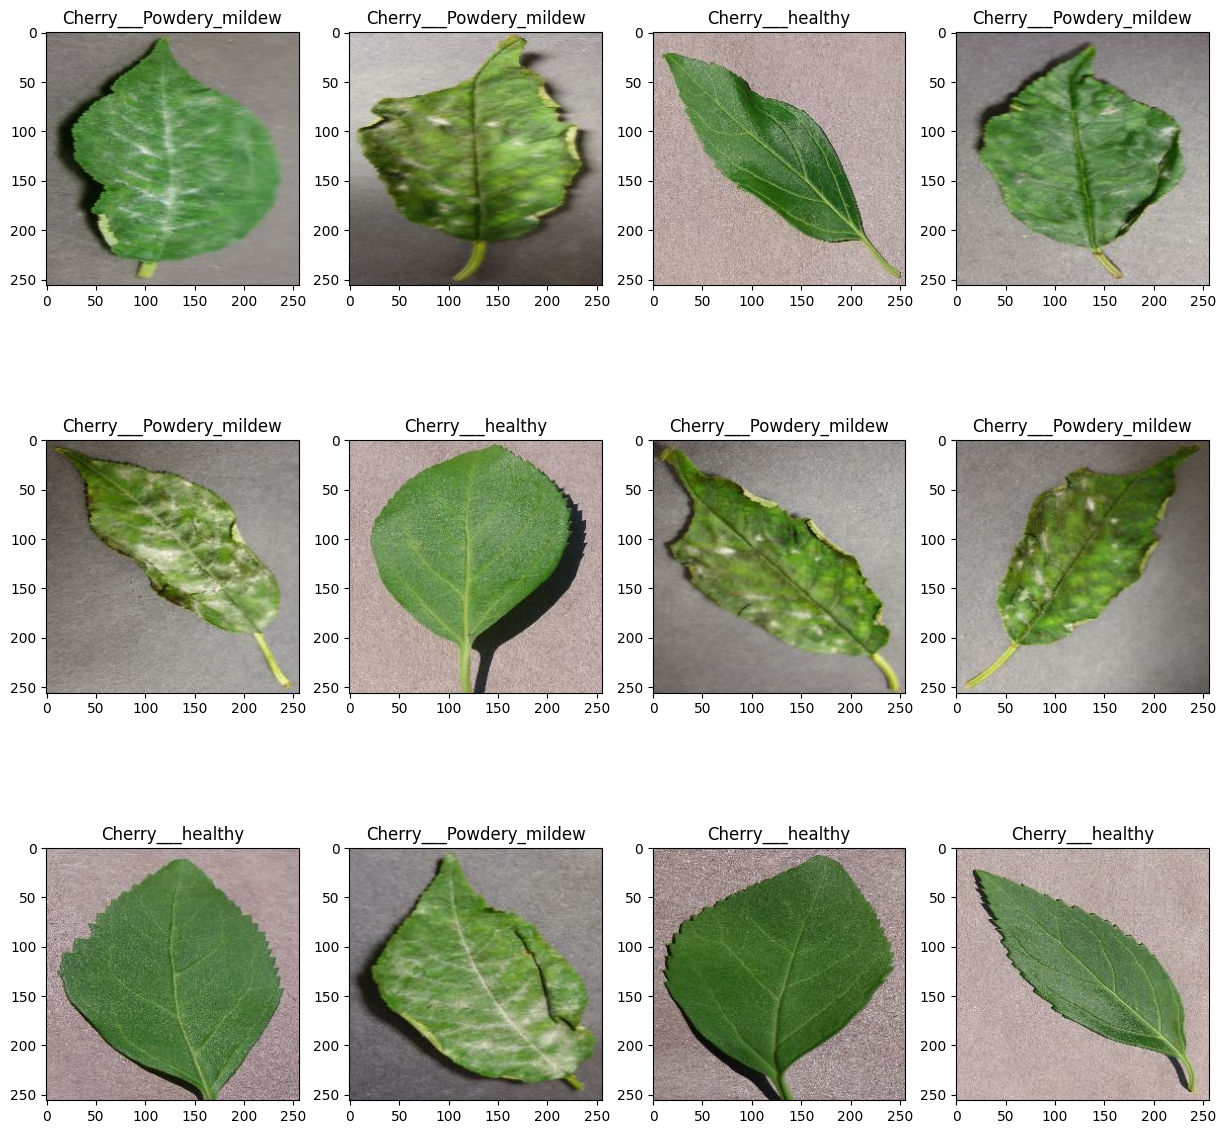

In [ ]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])

splitting the data

In [ ]:
# training data--> 80% , 20%--> for testing and validation
len(dataset)

60

In [ ]:
 train_set = len(dataset)*0.8
 train_set

48.0

In [ ]:
train_set =  dataset.take(48)
len(train_set)

48

In [ ]:
test_set = dataset.skip(48)
len(test_set)

12

In [ ]:
#split the remaining 20% into 10% ->validation and 10% ->test
len(dataset)*0.1

6.0

In [ ]:
valid_set = test_set.take(6)
len(valid_set)

6

In [ ]:
test_set = test_set.skip(6)
len(test_set)

6

In [ ]:
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_set = valid_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

preprocessing pipeline

In [ ]:
#resizing and rescaling the images
resize_rescale = tf.keras.Sequential([
                    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                    layers.Rescaling(1.0/255)
                     ])

In [ ]:
#data augmentation
data_augmentation = tf.keras.Sequential([
                      layers.RandomFlip("horizontal_and_vertical"),
                      layers.RandomRotation(0.2)
                  ])

build and train the model

In [ ]:
n_classes = 2

my_model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    resize_rescale,
    data_augmentation,
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
my_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,562 (947.51 KB)

 Trainable params: 242,562 (947.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
my_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = my_model.fit(
    train_set,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=valid_set,
    callbacks=[early_stopping]
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.7074 - loss: 0.5299 - val_accuracy: 0.9323 - val_loss: 0.1995
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9182 - loss: 0.1960 - val_accuracy: 0.9375 - val_loss: 0.1886
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9591 - loss: 0.1166 - val_accuracy: 0.9740 - val_loss: 0.0907
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.9665 - loss: 0.0983 - val_accuracy: 0.9792 - val_loss: 0.0694
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.9743 - loss: 0.0698 - val_accuracy: 0.9844 - val_loss: 0.0424
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9807 - loss: 0.0515 - val_accuracy: 0.9792 - val_loss: 0.0560
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9819 - loss: 0.0599 - val_accuracy: 0.9896 - val_loss: 0.0398
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.9803 - loss: 0.0494 - val_accuracy: 0.9948 - v

evaluating the model

In [ ]:
scores = my_model.evaluate(test_set)

6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 448ms/step - accuracy: 0.9883 - loss: 0.0483


In [ ]:
scores

[0.022849783301353455, 0.9946808218955994]

In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 48}

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

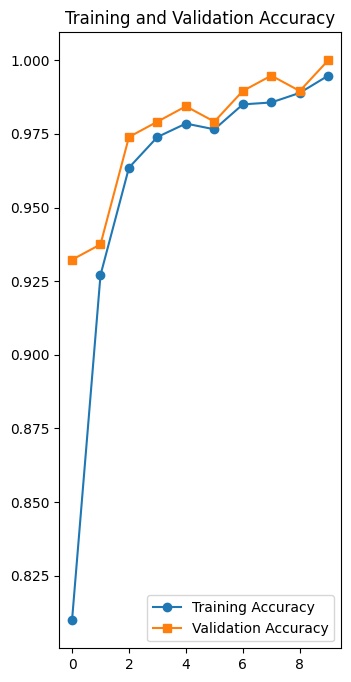

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), accuracy, marker='o', label='Training Accuracy')
plt.plot(range(EPOCH), val_accuracy, marker='s', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

make prediction on sample image

the image to predict: 
actual label:  Cherry___Powdery_mildew
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
predicted label:  Cherry___Powdery_mildew


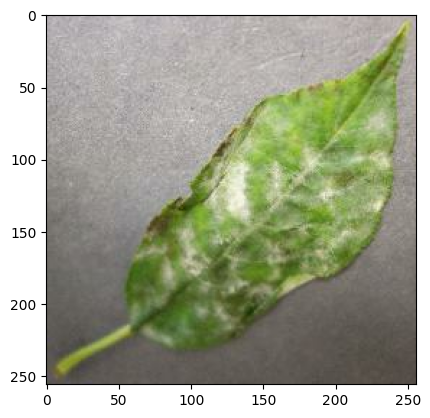

In [ ]:
import numpy as np
for image_batch, label_batch in test_set.take(1):
    print('the image to predict: ')
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print('actual label: ',class_names[label_batch[0].numpy()])

    batch_prediction = my_model.predict(image_batch)
    print('predicted label: ',class_names[np.argmax(batch_prediction[0])])

make a function to take an image as input and make prediction

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #convert image into array so the model can process
  img_array = tf.expand_dims(img_array, 0)  #add extra dimension to the image(create batch)

  predictions = my_model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 *(np.max(predictions[0])),2)  #to extract the highest probability and then convert into percentage
  return predicted_class,confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


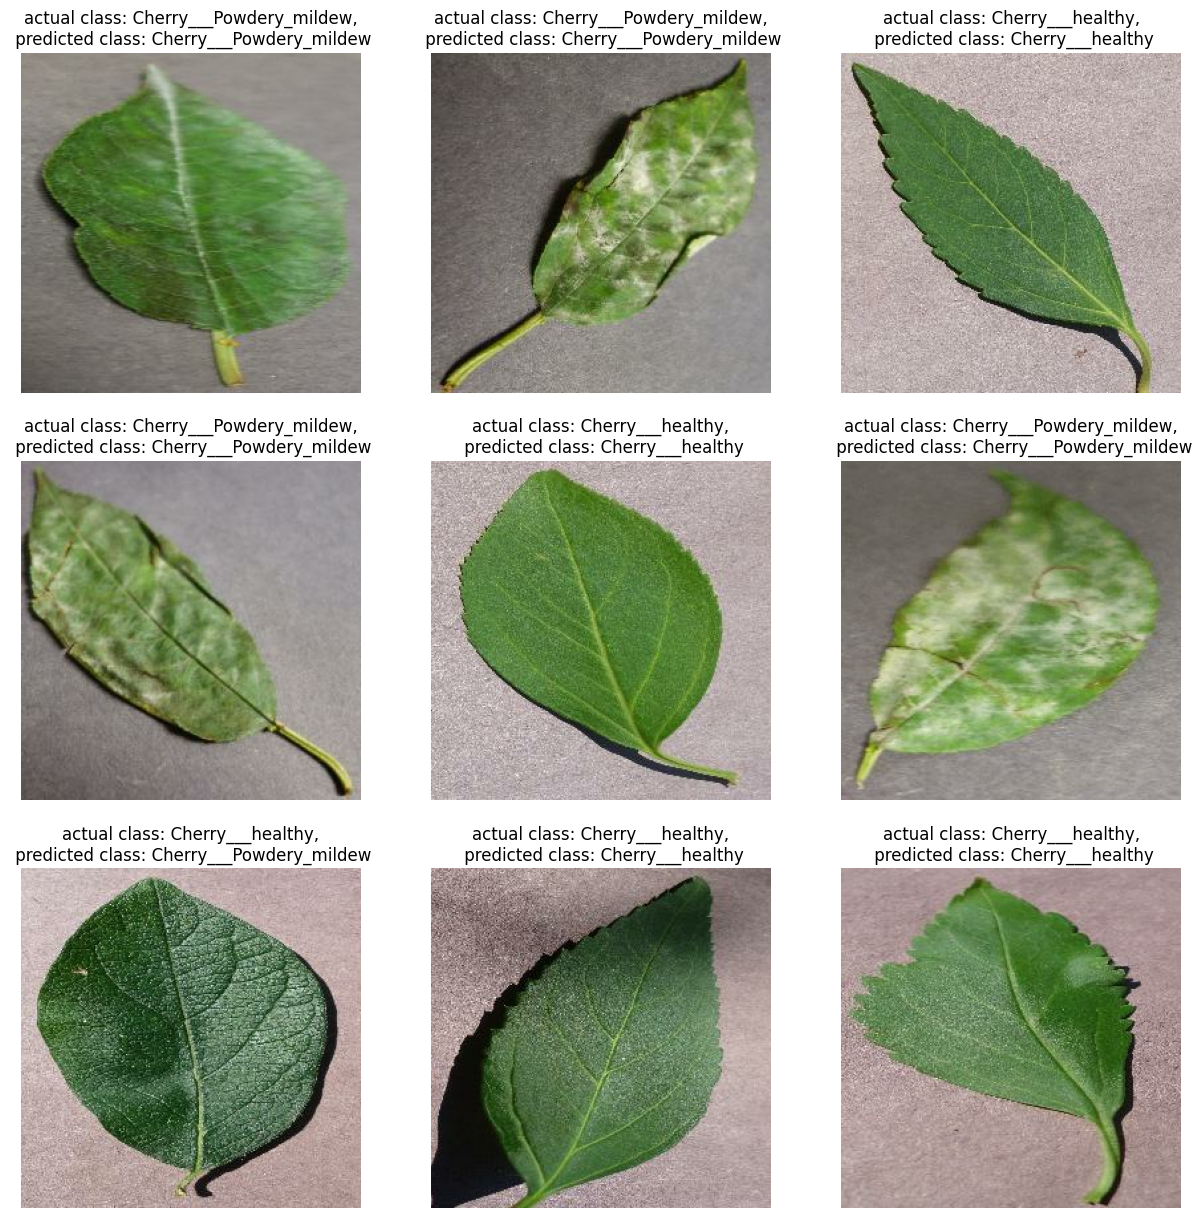

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_set.take(1):
    for i in range(9):
        axis = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidence = predict(my_model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f'actual class: {actual_class},\n predicted class: {predicted_class}')

        plt.axis("off")

save the model

In [ ]:
import json
my_model_json = my_model.to_json()
with open('my_model.json','w') as json_file:
  json_file.write(my_model_json)

my_model.save_weights('my_model.weights.h5')

In [ ]:
import os

model_dir = r'/content/model'  # Path for saving the model
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_version = 1
my_model.save(f'{model_dir}/{model_version}.keras')

In [ ]:
my_model.save('my_model.h5')